<a href="https://colab.research.google.com/github/Shayestha/Lab_2/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Car Price Prediction With Machine Learning**

In [24]:
from google.colab import files
uploaded_files=files.upload()

Saving task2.csv to task2.csv


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
df=pd.read_csv(r"task2.csv")

In [27]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [28]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [30]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [31]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [34]:
df.columns
print(df['fueltype'].value_counts())
print(df['aspiration'].value_counts())
print(df['enginelocation'].value_counts())
fueltype=df['fueltype']
aspiration=df['aspiration']
enginelocation=df['enginelocation']
price=df['price']

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64


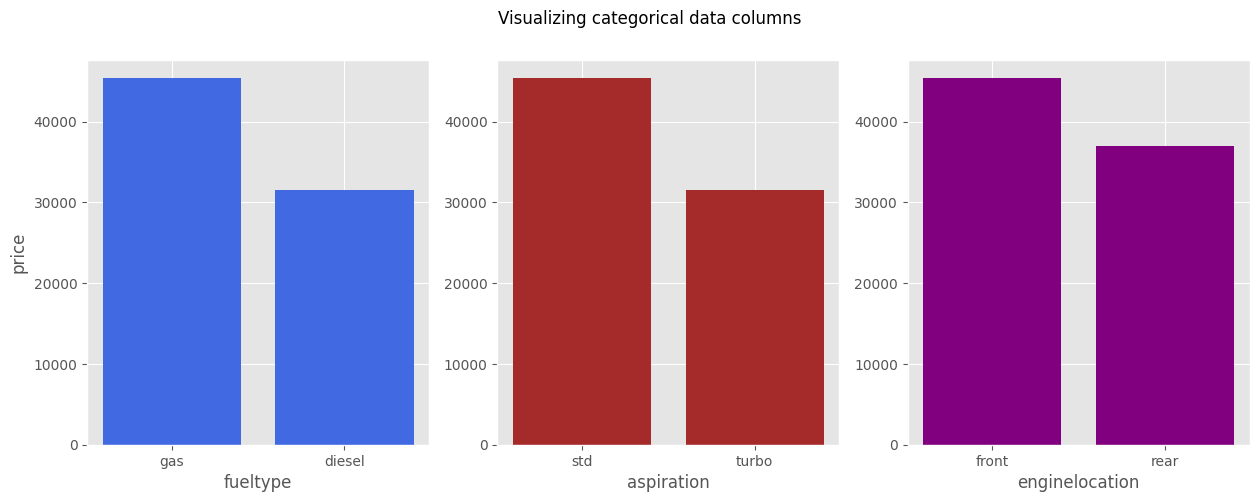

In [37]:
style.use('ggplot')
fig=plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fueltype,price,color='royalblue')
plt.xlabel("fueltype")
plt.ylabel("price")
plt.subplot(1,3,2)
plt.bar(aspiration,price,color='brown')
plt.xlabel("aspiration")
plt.subplot(1,3,3)
plt.bar(enginelocation,price,color='purple')
plt.xlabel('enginelocation')
plt.show()

<Axes: xlabel='enginelocation', ylabel='price'>

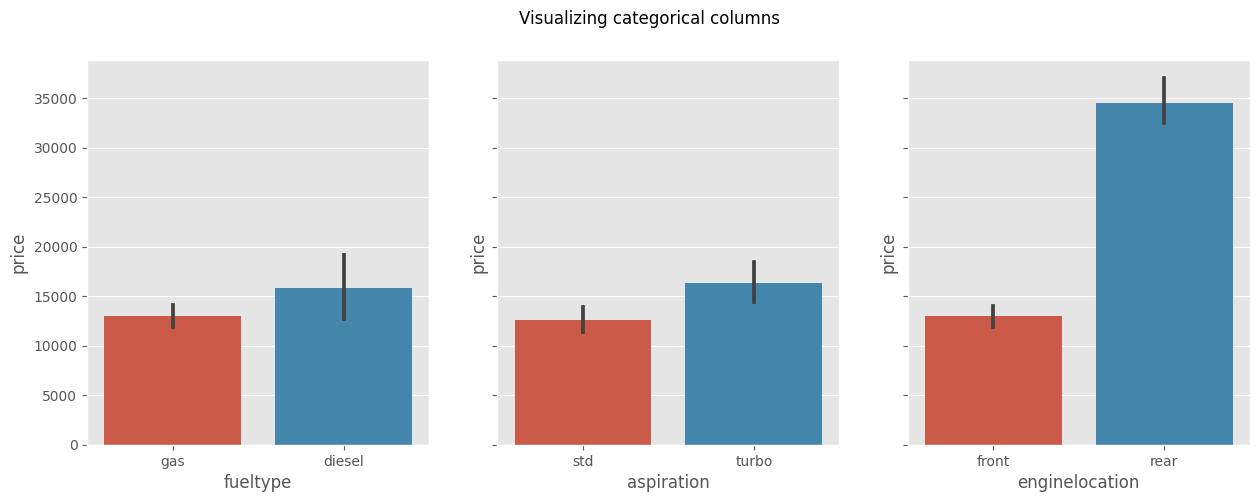

In [38]:
fig,axes=plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fueltype,y=price,ax=axes[0])
sns.barplot(x=aspiration,y=price,ax=axes[1])
sns.barplot(x=enginelocation,y=price,ax=axes[2])

In [39]:
gas_data=df.groupby('fueltype').get_group('gas')
gas_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,100.556757,0.913514,98.147568,173.188649,65.743243,53.496757,2518.459459,125.956757,3.324919,3.230541,8.860108,106.243243,5199.729730,24.670270,30.318919,12999.798200
std,59.827272,1.248077,5.613203,12.146825,2.073558,2.409422,501.000249,42.506371,0.269595,0.318475,0.690242,40.218699,434.688085,6.311173,6.555028,7984.409306
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4200.000000,13.000000,16.000000,5118.000000
25%,47.000000,0.000000,94.500000,166.300000,64.000000,51.600000,2128.000000,97.000000,3.150000,3.100000,8.500000,70.000000,4800.000000,19.000000,25.000000,7689.000000
50%,100.000000,1.000000,96.500000,172.600000,65.400000,53.700000,2405.000000,111.000000,3.310000,3.255000,9.000000,97.000000,5200.000000,24.000000,30.000000,9989.000000
75%,151.000000,2.000000,100.400000,178.500000,66.500000,55.400000,2847.000000,141.000000,3.580000,3.400000,9.400000,116.000000,5500.000000,30.000000,34.000000,15998.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,11.500000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [40]:
aspiration_data=df.groupby('aspiration').get_group('std')
aspiration_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,101.119048,0.869048,98.030357,172.694643,65.605952,53.625000,2476.369048,124.797619,3.302798,3.222679,9.592976,99.642857,5166.071429,25.839286,31.571429,12611.270833
std,59.818269,1.181492,5.582594,12.068945,2.049411,2.319967,502.959547,43.934295,0.264068,0.308578,2.747151,39.852616,462.009456,6.729442,7.027381,8214.342183
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.500000,48.000000,4200.000000,13.000000,16.000000,5118.000000
25%,47.750000,0.000000,94.500000,166.300000,64.000000,52.000000,2073.250000,97.000000,3.150000,3.095000,8.700000,69.750000,4800.000000,20.750000,27.000000,7446.000000
50%,100.500000,1.000000,96.500000,172.000000,65.400000,53.700000,2382.500000,110.000000,3.290000,3.255000,9.000000,88.000000,5200.000000,26.000000,31.500000,9418.000000
75%,155.250000,2.000000,100.400000,177.800000,66.500000,55.250000,2756.500000,136.000000,3.470000,3.400000,9.400000,114.000000,5500.000000,31.000000,37.000000,15527.500000
max,203.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


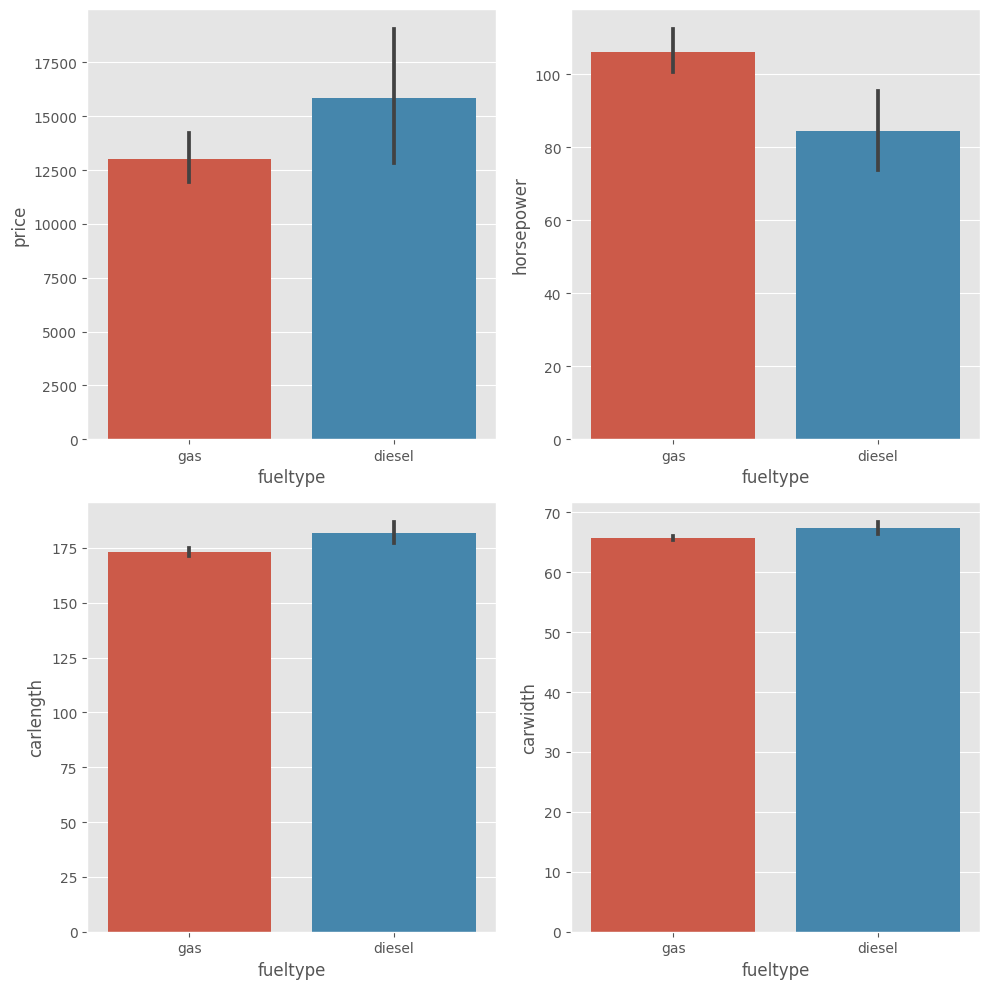

In [41]:
fig=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(x='fueltype',y='price',data=df)
plt.subplot(2,2,2)
sns.barplot(x='fueltype',y='horsepower',data=df)
plt.subplot(2,2,3)
sns.barplot(x='fueltype',y='carlength',data=df)
plt.subplot(2,2,4)
sns.barplot(x='fueltype',y='carwidth',data=df)
plt.tight_layout()

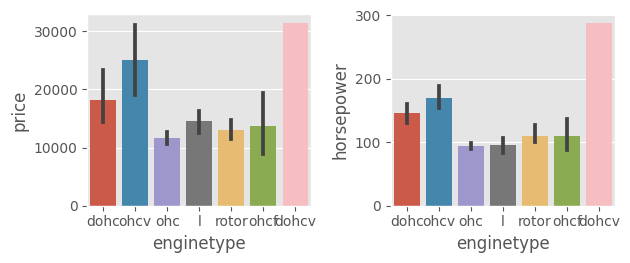

In [45]:
fig=plt.subplot(2,2,1)
sns.barplot(x='enginetype',y='price',data=df)
plt.subplot(2,2,2)
sns.barplot(x='enginetype',y='horsepower',data=df)
plt.tight_layout()

In [46]:
x=df.iloc[:,0:13].values
y=df.iloc[:,-1].values

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Count'>

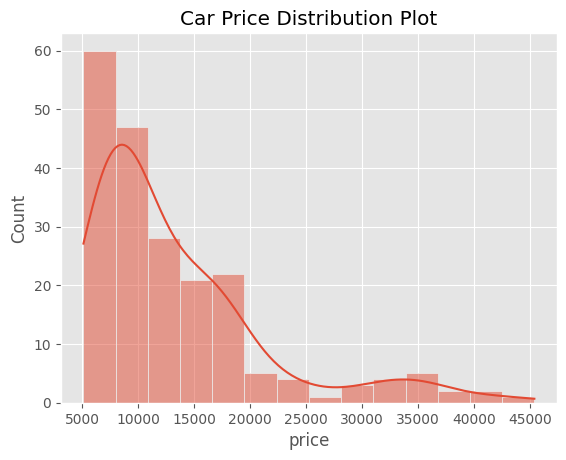

In [51]:
plt.title('Car Price Distribution Plot')
sns.histplot(df['price'],kde=True)

<Axes: title={'center': 'Car Price Spread'}, ylabel='price'>

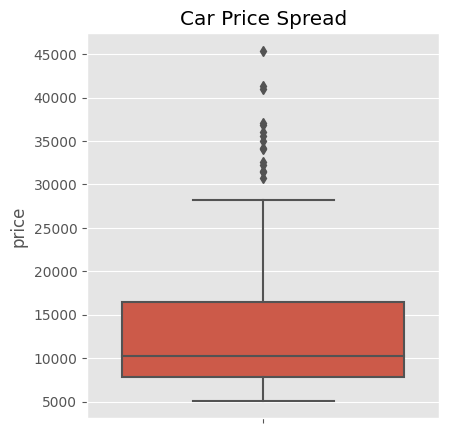

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

In [53]:
df.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)
df=pd.get_dummies(df,columns=['aspiration','enginelocation'],drop_first=True)

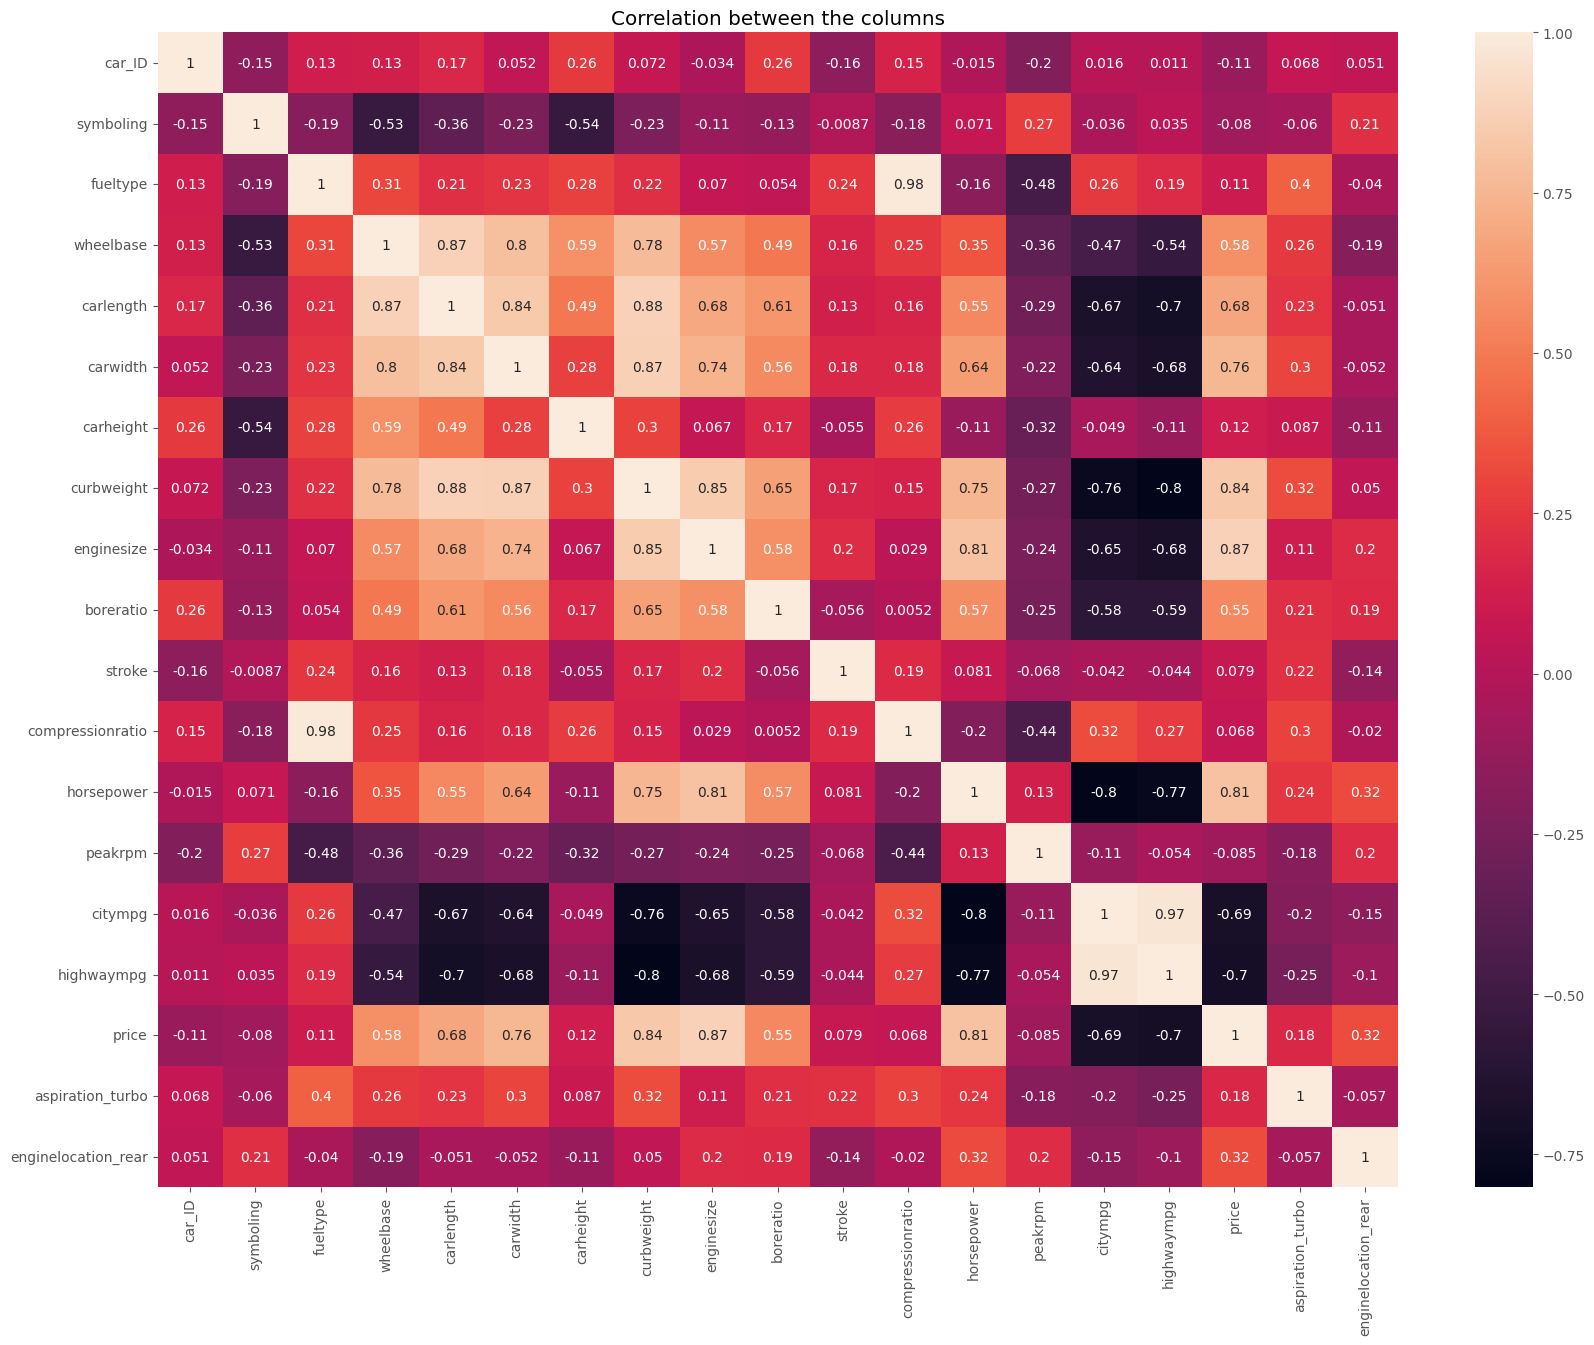

In [54]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

<Axes: title={'center': 'Correlation between CityMpg and HightwarMpg'}, xlabel='citympg', ylabel='highwaympg'>

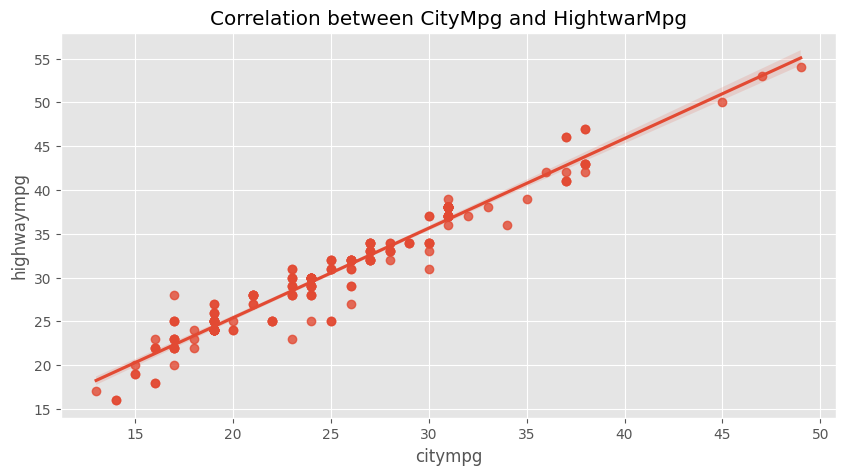

In [55]:
fig=plt.figure(figsize=(10,5))
plt.title('Correlation between CityMpg and HightwarMpg')
sns.regplot(x='citympg',y='highwaympg',data=df)

In [56]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'doornumber', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'aspiration_turbo',
       'enginelocation_rear'],
      dtype='object')

In [57]:
numerics=['int16','int32','int64','float16','float32','float64']
dfnum=df.select_dtypes(include=numerics)

In [58]:
dfnum.head()

,car_ID,symboling,fueltype,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [59]:
temp=dfnum.iloc[:,3:-1]
temp

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [60]:
dfnum.head()
X=dfnum.iloc[: ,3:-1]
Y=dfnum.iloc[:,-1]

In [62]:
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [63]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [66]:
X_train.shape

(143, 13)

In [67]:
X_test.shape

(62, 13)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model=LinearRegression()

In [70]:
model.fit(X_train,Y_train)

LinearRegression()